In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

In [3]:
q1 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/qsos1.csv")
q2 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/gals1r1.csv")
q3 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/qsovali.csv")
q4 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/galvali.csv")

In [4]:
q1.head()

,gw1,rw1,iw1,zw1,yw1,w12,ipk,zpk,w23,ra,dec,class
0,0.1291,0.0442,0.0763,-0.1097,-0.0390,0.645,-0.0798,-0.1306,1.347,130.182022,35.254021,QSO
1,1.1357,1.1314,1.1898,1.2547,1.0329,0.314,-0.1875,0.1815,0.872,211.456385,39.662792,QSO
2,0.6357,0.5618,0.5277,0.1935,0.2482,0.275,-0.0891,-0.0772,1.150,154.642487,55.115891,QSO
3,2.2020,2.1002,2.0227,2.0110,1.4642,0.564,-0.0226,0.0504,1.303,355.534149,14.697548,QSO
4,0.7686,0.7570,0.5810,0.7206,0.5224,0.732,-0.0889,-0.1298,1.017,145.067429,16.637278,QSO


In [5]:
data1 = pd.concat([q1, q2], ignore_index = True)
#merge q1 and q2#
data2 = pd.concat([q3, q4], ignore_index = True)
#merge q3 and q4#

In [6]:
data1.head()

,gw1,rw1,iw1,zw1,yw1,w12,ipk,zpk,w23,ra,dec,class
0,0.1291,0.0442,0.0763,-0.1097,-0.0390,0.645,-0.0798,-0.1306,1.347,130.182022,35.254021,QSO
1,1.1357,1.1314,1.1898,1.2547,1.0329,0.314,-0.1875,0.1815,0.872,211.456385,39.662792,QSO
2,0.6357,0.5618,0.5277,0.1935,0.2482,0.275,-0.0891,-0.0772,1.150,154.642487,55.115891,QSO
3,2.2020,2.1002,2.0227,2.0110,1.4642,0.564,-0.0226,0.0504,1.303,355.534149,14.697548,QSO
4,0.7686,0.7570,0.5810,0.7206,0.5224,0.732,-0.0889,-0.1298,1.017,145.067429,16.637278,QSO


In [7]:
target_names=np.array(['QSO','STAR'])

In [8]:
train = data1
test = data2

In [9]:
train.sort_index(inplace=True)
test.sort_index(inplace=True)

In [10]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 20000
Number of observations in the test data: 20000


In [11]:
# Create a list of the feature column's names
features = train.columns[:8]

# View features
features

Index(['gw1', 'rw1', 'iw1', 'zw1', 'yw1', 'w12', 'ipk', 'zpk'], dtype='object')

In [12]:
pd.factorize(train['class'])

(array([0, 0, 0, ..., 1, 1, 1]), Index(['QSO', 'GALAXY'], dtype='object'))

In [13]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['class'])[0]

# View target
y

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
train['class']

0           QSO
1           QSO
2           QSO
3           QSO
4           QSO
5           QSO
6           QSO
7           QSO
8           QSO
9           QSO
10          QSO
11          QSO
12          QSO
13          QSO
14          QSO
15          QSO
16          QSO
17          QSO
18          QSO
19          QSO
20          QSO
21          QSO
22          QSO
23          QSO
24          QSO
25          QSO
26          QSO
27          QSO
28          QSO
29          QSO
          ...  
19970    GALAXY
19971    GALAXY
19972    GALAXY
19973    GALAXY
19974    GALAXY
19975    GALAXY
19976    GALAXY
19977    GALAXY
19978    GALAXY
19979    GALAXY
19980    GALAXY
19981    GALAXY
19982    GALAXY
19983    GALAXY
19984    GALAXY
19985    GALAXY
19986    GALAXY
19987    GALAXY
19988    GALAXY
19989    GALAXY
19990    GALAXY
19991    GALAXY
19992    GALAXY
19993    GALAXY
19994    GALAXY
19995    GALAXY
19996    GALAXY
19997    GALAXY
19998    GALAXY
19999    GALAXY
Name: class, Length: 200

In [15]:
clf = RandomForestClassifier(n_estimators=100, 
#                              max_features=1,
#                              max_depth=1,
                             n_jobs=8,
#并行处理的几何数
                             random_state=15,
                             #随机数种子
                             class_weight="balanced"
#                              ,
#                              class_weight={0:1,1:20,2:5}
                            )
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=8, oob_score=False, random_state=15,
            verbose=0, warm_start=False)

In [16]:
y_test = pd.factorize(test['class'])[0]
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
test.iloc[:,:8].values

array([[ 2.1426000e+00,  1.8030000e+00,  1.6769000e+00, ...,
         3.5200000e-01, -7.9100000e-02, -2.0000000e-03],
       [ 1.9530000e+00,  2.0130000e+00,  1.7887000e+00, ...,
         4.2900000e-01,  5.6200000e-02,  6.2800000e-02],
       [ 1.5563000e+00,  1.1660000e+00,  5.4010000e-01, ...,
         4.5900000e-01, -5.4300000e-02,  5.3500000e-02],
       ...,
       [ 1.9664001e+00,  1.3699017e+00,  7.7160070e-01, ...,
        -6.1700060e-01,  9.5129967e-01,  1.0173988e+00],
       [ 3.6121006e+00,  3.2168007e+00,  2.6120014e+00, ...,
        -6.1100006e-01,  7.0750046e-01,  7.8599930e-01],
       [ 4.0727997e+00,  2.8964996e+00,  2.0752983e+00, ...,
        -5.6999970e-01,  5.0560000e-01,  6.2540054e-01]])

In [18]:
y_pred = clf.predict_proba(test.iloc[:,:8].values)

y_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [19]:
y_pred = clf.predict(test[features])
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
from sklearn.metrics import matthews_corrcoef
m_corr = matthews_corrcoef(y_test, y_pred)
m_corr

0.9896

In [19]:
range(len(y_pred))

range(0, 20000)

In [20]:
y_scores = np.array([y_pred[i][0] if y_test[i]==0 else y_pred[i][1] for i in range(len(y_pred))])
y_scores

array([1., 1., 1., ..., 1., 1., 1.])

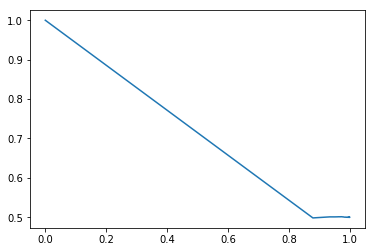

In [21]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(recall,precision)
plt.show()

In [22]:
scores=cross_val_score(clf,train[features],y,cv=5)
print("交叉验证准确率：",scores)

交叉验证准确率： [0.9945  0.99575 0.99575 0.994   0.99275]


In [23]:
# Create actual english names for the plants for each predicted plant class
preds = target_names[clf.predict(test[features])]
# Create confusion matrix
pd.crosstab(test['class'], preds, rownames=['Actual classes'], colnames=['Predicted classes'])

Predicted classes,QSO,STAR
Actual classes,,
GALAXY,52,9948
QSO,9948,52


In [24]:
test['preds'] = preds
preds

array(['QSO', 'QSO', 'QSO', ..., 'STAR', 'STAR', 'STAR'], dtype='<U4')

In [25]:
len(test[(test['preds']=='QSO')&(test['class']=='QSO')])

9948

In [26]:
len(test[(test['preds']=='STAR')&(test['class']=='STAR')])

0